## PROJET FINAL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## CHARGEMENT LES DONNEES

In [68]:
# Analyse initiale des données
dim_employe = pd.read_csv("PaieGuard_dim_employe.csv")
dim_periode = pd.read_csv('PaieGuard_dim_periode.csv')
fact_paie = pd.read_csv('PaieGuard_fact_paie.csv')

# ANALYSE INITIALE DES DONNEES

In [74]:
# Analyse initiale des données
print("=== DIMENSION EMPLOYÉ ===")
print(dim_employe)
print(f"\nShape: {dim_employe.shape}")
print(f"Types: {dim_employe.dtypes}")

=== DIMENSION EMPLOYÉ ===
   employe_id     nom              poste type_contrat  salaire_base
0           1  Martin          Comptable          CDI          2800
1           2  Dupont                 RH          CDI          3000
2           3   Ngoma        Développeur          CDD          2500
3           4  Diallo      Analyste Data          CDI          3200
4           5  Ouesso  Gestionnaire Paie          CDD          2600

Shape: (5, 5)
Types: employe_id       int64
nom             object
poste           object
type_contrat    object
salaire_base     int64
dtype: object


In [75]:
print("\n=== DIMENSION PÉRIODE ===")
print(dim_periode)
print(f"\nShape: {dim_periode.shape}")


=== DIMENSION PÉRIODE ===
   periode_id     mois  jours_travailles  taux_charges  smic_reference
0           1  2024-08                22          0.22            1766
1           2  2024-09                21          0.22            1766
2           3  2024-10                23          0.23            1766
3           4  2024-11                20          0.23            1766
4           5  2024-12                21          0.24            1766

Shape: (5, 5)


In [77]:
print("\n=== FACT PAIE - APERÇU ===")
print(fact_paie.head(5))
print(f"\nShape: {fact_paie.shape}")



=== FACT PAIE - APERÇU ===
   paie_id  employe_id  periode_id  heures_travaillees  heures_sup  primes  \
0        1           4           3              153.70          10     500   
1        2           5           1              144.83           0     300   
2        3           3           1              167.07           0       0   
3        4           5           2              130.98           0       0   
4        5           5           4              158.40           0     150   

   absences_jours  salaire_brut  charges_sociales  salaire_net  anomalie  
0               0          3950             908.5       3041.5         0  
1               3          2600             572.0       2028.0         0  
2               0          2500             550.0       1950.0         0  
3               0          2600             572.0       2028.0         0  
4               2          2550             586.5       1963.5         0  

Shape: (8020, 11)


In [78]:
print(f"\nStatistiques descriptives:")
print(fact_paie.describe())


Statistiques descriptives:
           paie_id   employe_id   periode_id  heures_travaillees   heures_sup  \
count  8020.000000  8020.000000  8020.000000         8020.000000  8020.000000   
mean   4010.500000     3.006733     3.004863          151.553732     3.324190   
std    2315.318913     1.418512     1.425141            9.873267     4.559087   
min       1.000000     1.000000     1.000000          116.770000     0.000000   
25%    2005.750000     2.000000     2.000000          144.730000     0.000000   
50%    4010.500000     3.000000     3.000000          151.490000     0.000000   
75%    6015.250000     4.000000     4.000000          158.230000     5.000000   
max    8020.000000     5.000000     5.000000          184.850000    15.000000   

            primes  absences_jours  salaire_brut  charges_sociales  \
count  8020.000000     8020.000000   8020.000000       8020.000000   
mean    130.423940        0.513716   2983.653367        680.277400   
std     162.402064        0.8792

# VISUALISATION DES DONNEES

# Nettoyage des données

In [80]:
dim_employe.dropna()

,employe_id,nom,poste,type_contrat,salaire_base
0,1,Martin,Comptable,CDI,2800
1,2,Dupont,RH,CDI,3000
2,3,Ngoma,Développeur,CDD,2500
3,4,Diallo,Analyste Data,CDI,3200
4,5,Ouesso,Gestionnaire Paie,CDD,2600


In [34]:
dim_periode.dropna()

,periode_id,mois,jours_travailles,taux_charges,smic_reference
0,1,2024-08,22,0.22,1766
1,2,2024-09,21,0.22,1766
2,3,2024-10,23,0.23,1766
3,4,2024-11,20,0.23,1766
4,5,2024-12,21,0.24,1766


In [27]:
fact_paie.dropna()

,paie_id,employe_id,periode_id,heures_travaillees,heures_sup,primes,absences_jours,salaire_brut,charges_sociales,salaire_net,anomalie
0,1,4,3,153.70,10,500,0,3950,908.50,3041.50,0
1,2,5,1,144.83,0,300,3,2600,572.00,2028.00,0
2,3,3,1,167.07,0,0,0,2500,550.00,1950.00,0
3,4,5,2,130.98,0,0,0,2600,572.00,2028.00,0
4,5,5,4,158.40,0,150,2,2550,586.50,1963.50,0
...,...,...,...,...,...,...,...,...,...,...,...
8015,8016,5,4,149.00,0,150,0,2750,632.50,2117.50,0
8016,8017,5,4,147.34,5,0,0,2725,626.75,2098.25,0
8017,8018,2,2,159.54,0,0,1,2900,638.00,2262.00,0
8018,8019,1,4,158.46,0,150,0,2950,678.50,2271.50,0


# Analyse des anomalies potentielles

In [82]:
# Fusionner les données pour analyse complète
# Créer une vue complète

df_complete = fact_paie.merge(dim_employe, on='employe_id', how='left')
df_complete = df_complete.merge(dim_periode, on='periode_id', how='left')

print("\n=== ANALYSE DES ANOMALIES POTENTIELLES ===")

# 1. Vérifier les heures travaillées anormales
print("1. HEURES TRAVAILLÉES:")
print(f"   Moyenne: {df_complete['heures_travaillees'].mean():.2f}h")
print(f"   Écart-type: {df_complete['heures_travaillees'].std():.2f}h")
print(f"   Min: {df_complete['heures_travaillees'].min():.2f}h")
print(f"   Max: {df_complete['heures_travaillees'].max():.2f}h")


=== ANALYSE DES ANOMALIES POTENTIELLES ===
1. HEURES TRAVAILLÉES:
   Moyenne: 151.55h
   Écart-type: 9.87h
   Min: 116.77h
   Max: 184.85h


In [84]:
# Heures anormalement basses ou hautes (hors 2 écarts-types)
heures_mean = df_complete['heures_travaillees'].mean()
heures_std = df_complete['heures_travaillees'].std()
anomalies_heures = df_complete[
    (df_complete['heures_travaillees'] < heures_mean - 2*heures_std) | 
    (df_complete['heures_travaillees'] > heures_mean + 2*heures_std)
]
print(f"   Anomalies détectées: {len(anomalies_heures)} ({len(anomalies_heures)/len(df_complete)*100:.2f}%)")

# 2. Analyse par employé
print("\n2.=== ANALYSE PAR EMPLOYÉ:===")
stats_employe = df_complete.groupby('nom').agg({
    'salaire_brut': ['mean', 'std', 'min', 'max'],
    'heures_travaillees': ['mean', 'std'],
    'heures_sup': 'mean',
    'primes': 'mean'
}).round(2)
print(stats_employe)

   Anomalies détectées: 358 (4.46%)

2.=== ANALYSE PAR EMPLOYÉ:===
       salaire_brut                     heures_travaillees       heures_sup  \
               mean     std   min   max               mean   std       mean   
nom                                                                           
Diallo      3370.26  215.07  2900  4075             151.44  9.79       3.37   
Dupont      3152.77  216.52  2700  3875             151.57  9.91       3.33   
Martin      2965.45  218.68  2500  3675             151.68  9.87       3.39   
Ngoma       2666.36  217.98  2200  3375             151.60  9.91       3.36   
Ouesso      2756.31  216.86  2300  3475             151.48  9.91       3.17   

        primes  
          mean  
nom             
Diallo  132.46  
Dupont  123.69  
Martin  130.18  
Ngoma   132.52  
Ouesso  133.36  


# 3. Vérifions les écarts de salaire

In [87]:
print("\n3. ÉCARTS DE SALAIRE:")

for nom in df_complete['nom'].unique():
    emp_data = df_complete[df_complete['nom'] == nom]
    salaire_base = emp_data['salaire_base'].iloc[0]
    salaire_moyen = emp_data['salaire_brut'].mean()
    ecart = ((salaire_moyen - salaire_base) / salaire_base) * 100
    print(f"   {nom}: Salaire base = {salaire_base}€, Moyenne = {salaire_moyen:.2f}€, Écart = {ecart:+.1f}%")


3. ÉCARTS DE SALAIRE:
   Diallo: Salaire base = 3200€, Moyenne = 3370.26€, Écart = +5.3%
   Ouesso: Salaire base = 2600€, Moyenne = 2756.31€, Écart = +6.0%
   Ngoma: Salaire base = 2500€, Moyenne = 2666.36€, Écart = +6.7%
   Dupont: Salaire base = 3000€, Moyenne = 3152.77€, Écart = +5.1%
   Martin: Salaire base = 2800€, Moyenne = 2965.45€, Écart = +5.9%


In [10]:
# Détection avancée d'anomalies
print("=== DÉTECTION AVANCÉE D'ANOMALIES ===\n")
# 4. Détection d'anomalies basée sur les règles métier
anomalies_detectees = []

# Règle 1: Heures travaillées < 130h (trop peu)
anomalie_heures_basses = df_complete[df_complete['heures_travaillees'] < 130]
print(f"Règle 1 - Heures < 130h: {len(anomalie_heures_basses)} cas")

# Règle 2: Heures travaillées > 175h (trop élevées sans justification)
anomalie_heures_hautes = df_complete[df_complete['heures_travaillees'] > 175]
print(f"Règle 2 - Heures > 175h: {len(anomalie_heures_hautes)} cas")

# Règle 3: Primes > 400€ (anormalement élevées)
anomalie_primes = df_complete[df_complete['primes'] > 400]
print(f"Règle 3 - Primes > 400€: {len(anomalie_primes)} cas")

# Règle 4: Absences > 2 jours avec salaire normal
anomalie_absences = df_complete[(df_complete['absences_jours'] > 2) & (df_complete['salaire_brut'] > df_complete['salaire_base'])]
print(f"Règle 4 - Absences > 2j avec salaire élevé: {len(anomalie_absences)} cas")

# Règle 5: Écart salaire vs base > 30%
df_complete['ecart_salaire'] = ((df_complete['salaire_brut'] - df_complete['salaire_base']) / df_complete['salaire_base']) * 100
anomalie_ecart = df_complete[df_complete['ecart_salaire'] > 30]
print(f"Règle 5 - Écart salaire > 30%: {len(anomalie_ecart)} cas")

# Règle 6: Heures sup > 15h (dépassement légal)
anomalie_hs = df_complete[df_complete['heures_sup'] > 12]
print(f"Règle 6 - Heures sup > 12h: {len(anomalie_hs)} cas")

=== DÉTECTION AVANCÉE D'ANOMALIES ===

Règle 1 - Heures < 130h: 122 cas
Règle 2 - Heures > 175h: 76 cas
Règle 3 - Primes > 400€: 793 cas
Règle 4 - Absences > 2j avec salaire élevé: 89 cas
Règle 5 - Écart salaire > 30%: 22 cas
Règle 6 - Heures sup > 12h: 394 cas


# Statistiques globales

In [11]:
print(f"\n=== STATISTIQUES GLOBALES ===")
print(f"Total bulletins analysés: {len(df_complete)}")
print(f"Période couverte: Août - Décembre 2024")
print(f"Nombre d'employés: {df_complete['employe_id'].nunique()}")
print(f"Masse salariale totale: {df_complete['salaire_brut'].sum():,.2f} €")
print(f"Charges sociales totales: {df_complete['charges_sociales'].sum():,.2f} €")
print(f"Coût total employeur: {(df_complete['salaire_brut'] + df_complete['charges_sociales']).sum():,.2f} €")


=== STATISTIQUES GLOBALES ===
Total bulletins analysés: 8020
Période couverte: Août - Décembre 2024
Nombre d'employés: 5
Masse salariale totale: 23,928,900.00 €
Charges sociales totales: 5,455,824.75 €
Coût total employeur: 29,384,724.75 €


# Créons les visualisations pour la présentation

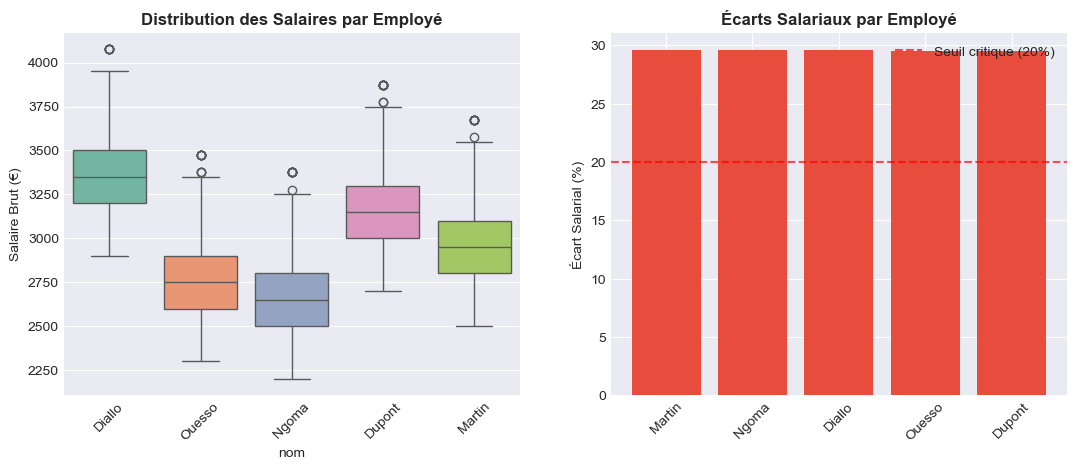

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuration du style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Charger les données avec analyses
dim_employe = pd.read_csv("PaieGuard_dim_employe.csv")
dim_periode = pd.read_csv('PaieGuard_dim_periode.csv')
fact_paie = pd.read_csv('PaieGuard_fact_paie.csv')

df_complete = fact_paie.merge(dim_employe, on='employe_id', how='left')
df_complete = df_complete.merge(dim_periode, on='periode_id', how='left')
# Ajouter les analyses
df_complete['ecart_salaire_pct'] = ((df_complete['salaire_brut'] - df_complete['salaire_net']) / df_complete['salaire_net']) * 100
df_complete['score_risque'] = 0
df_complete.loc[df_complete['heures_travaillees'] < 130, 'score_risque'] += 3
df_complete.loc[df_complete['heures_travaillees'] > 175, 'score_risque'] += 3
df_complete.loc[df_complete['primes'] > 400, 'score_risque'] += 2
df_complete.loc[df_complete['heures_sup'] > 12, 'score_risque'] += 4
df_complete.loc[df_complete['ecart_salaire_pct'] > 20, 'score_risque'] += 3
# Fixed line below - completed the condition and added the score increment
df_complete.loc[(df_complete['absences_jours'] > 2) & (df_complete['salaire_brut'] > 0), 'score_risque'] += 2

def classifier_risque(score):
    if score == 0:
        return 'Faible'
    elif score <= 2:
        return 'Moyen'
    elif score <= 5:
        return 'Élevé'
    else:
        return 'Critique'

df_complete['niveau_risque'] = df_complete['score_risque'].apply(classifier_risque)
# Créer les visualisations
fig = plt.figure(figsize=(20, 16))

# 1. Distribution des salaires par employé
plt.subplot(3, 3, 1)
sns.boxplot(
    data=df_complete,
    x='nom',
    y='salaire_brut',
    hue='nom',
    palette='Set2',
    legend=False
)
plt.title('Distribution des Salaires par Employé', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Salaire Brut (€)')

# 2. Écarts salariaux
plt.subplot(3, 3, 2)
ecarts_emp = df_complete.groupby('nom')['ecart_salaire_pct'].mean().sort_values(ascending=False)
colors = ['#2ecc71' if x < 10 else '#f39c12' if x < 15 else '#e74c3c' for x in ecarts_emp.values]
plt.bar(ecarts_emp.index, ecarts_emp.values, color=colors)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=20, color='red', linestyle='--', alpha=0.7, label='Seuil critique (20%)')
plt.title('Écarts Salariaux par Employé', fontsize=12, fontweight='bold')
plt.ylabel('Écart Salarial (%)')
plt.xticks(rotation=45)
plt.legend()

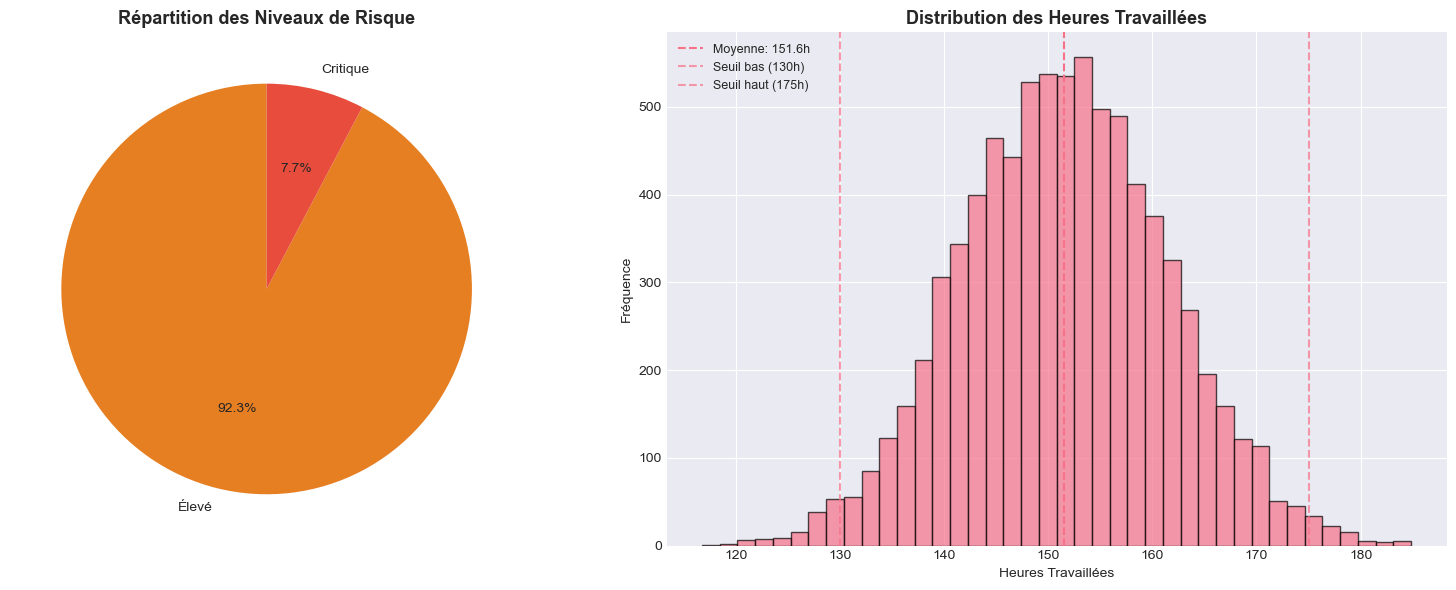

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 3. Répartition des niveaux de risque (Pie) ---
risque_counts = df_complete['niveau_risque'].value_counts()
colors_risque = {'Faible': '#2ecc71', 'Moyen': '#f39c12', 'Élevé': '#e67e22', 'Critique': '#e74c3c'}
colors_ordered = [colors_risque[r] for r in risque_counts.index]

axes[0].pie(
    risque_counts.values,
    labels=risque_counts.index,
    autopct='%1.1f%%',
    colors=colors_ordered,
    startangle=90
)
axes[0].set_title('Répartition des Niveaux de Risque', fontsize=13, fontweight='bold')


# --- 4. Distribution des heures travaillées (Hist) ---
axes[1].hist(df_complete['heures_travaillees'], bins=40, edgecolor='black', alpha=0.7)
axes[1].axvline(df_complete['heures_travaillees'].mean(), linestyle='--',
                label=f'Moyenne: {df_complete["heures_travaillees"].mean():.1f}h')
axes[1].axvline(130, linestyle='--', alpha=0.7, label='Seuil bas (130h)')
axes[1].axvline(175, linestyle='--', alpha=0.7, label='Seuil haut (175h)')

axes[1].set_title('Distribution des Heures Travaillées', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Heures Travaillées')
axes[1].set_ylabel('Fréquence')
axes[1].legend(fontsize=9)


plt.tight_layout()
plt.show()

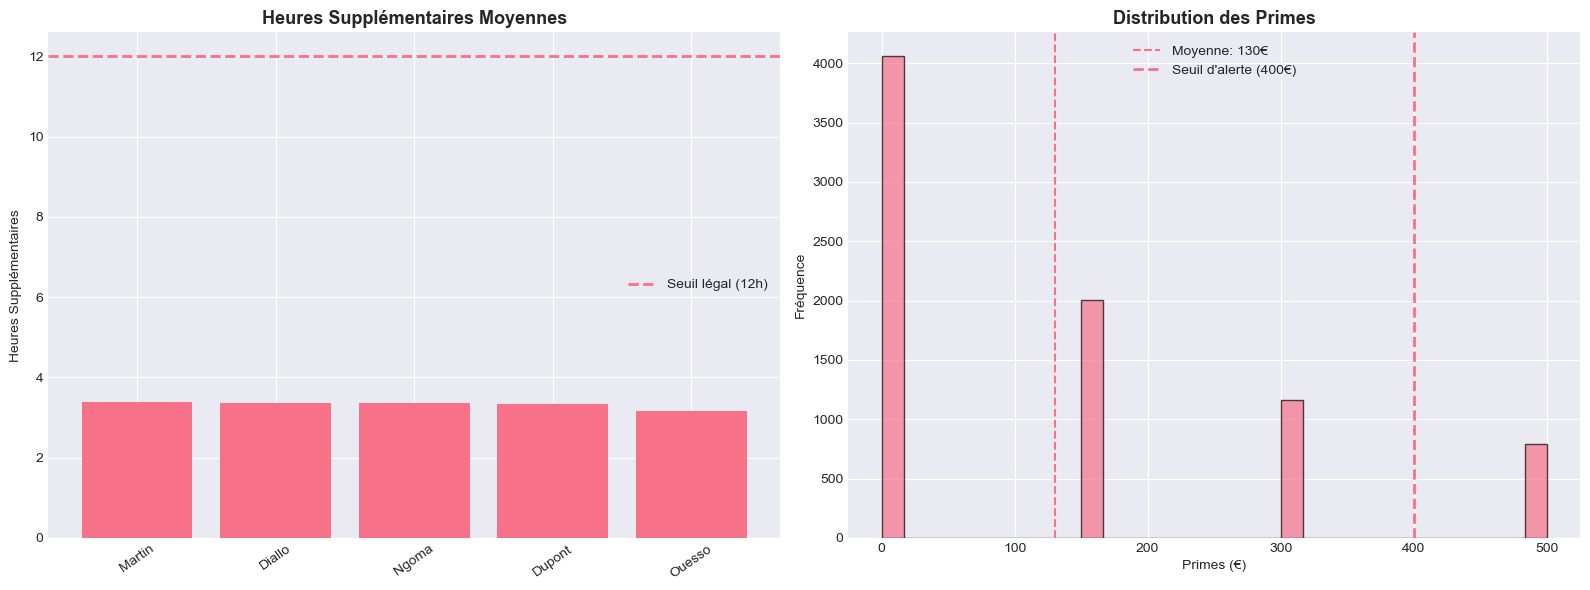

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 5. Heures supplémentaires par employé ---
heures_sup_emp = df_complete.groupby('nom')['heures_sup'].mean().sort_values(ascending=False)

axes[0].bar(heures_sup_emp.index, heures_sup_emp.values)
axes[0].axhline(y=12, linestyle='--', linewidth=2, label='Seuil légal (12h)')

axes[0].set_title('Heures Supplémentaires Moyennes', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Heures Supplémentaires')
axes[0].tick_params(axis='x', rotation=35)
axes[0].legend()


# --- 6. Distribution des primes ---
axes[1].hist(df_complete['primes'], bins=30, edgecolor='black', alpha=0.7)

axes[1].axvline(df_complete['primes'].mean(), linestyle='--',
                label=f'Moyenne: {df_complete["primes"].mean():.0f}€')
axes[1].axvline(400, linestyle='--', linewidth=2, label="Seuil d'alerte (400€)")

axes[1].set_title('Distribution des Primes', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Primes (€)')
axes[1].set_ylabel('Fréquence')
axes[1].legend()


plt.tight_layout()
plt.show()

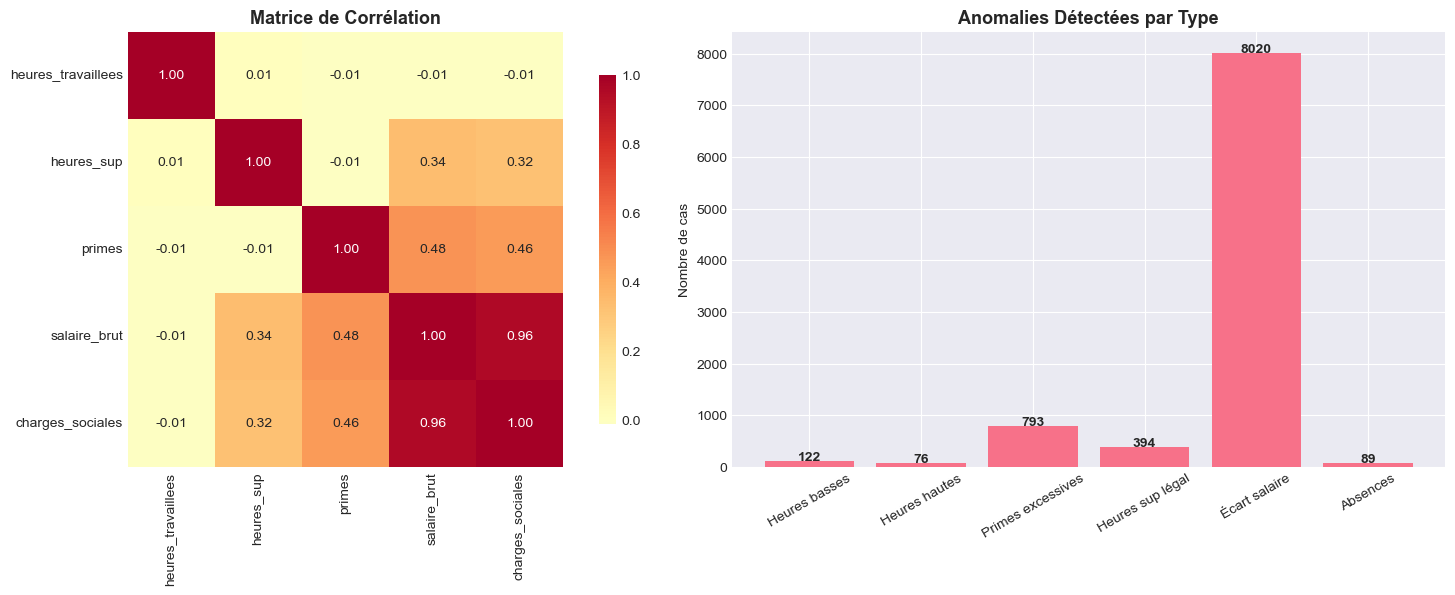

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=axes[0])
axes[0].set_title("Matrice de Corrélation", fontsize=13, fontweight='bold')

axes[1].bar(anomalies_data.keys(), anomalies_data.values())
axes[1].set_title("Anomalies Détectées par Type", fontsize=13, fontweight='bold')
axes[1].set_ylabel("Nombre de cas")
axes[1].tick_params(axis='x', rotation=30)

for i, v in enumerate(anomalies_data.values()):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


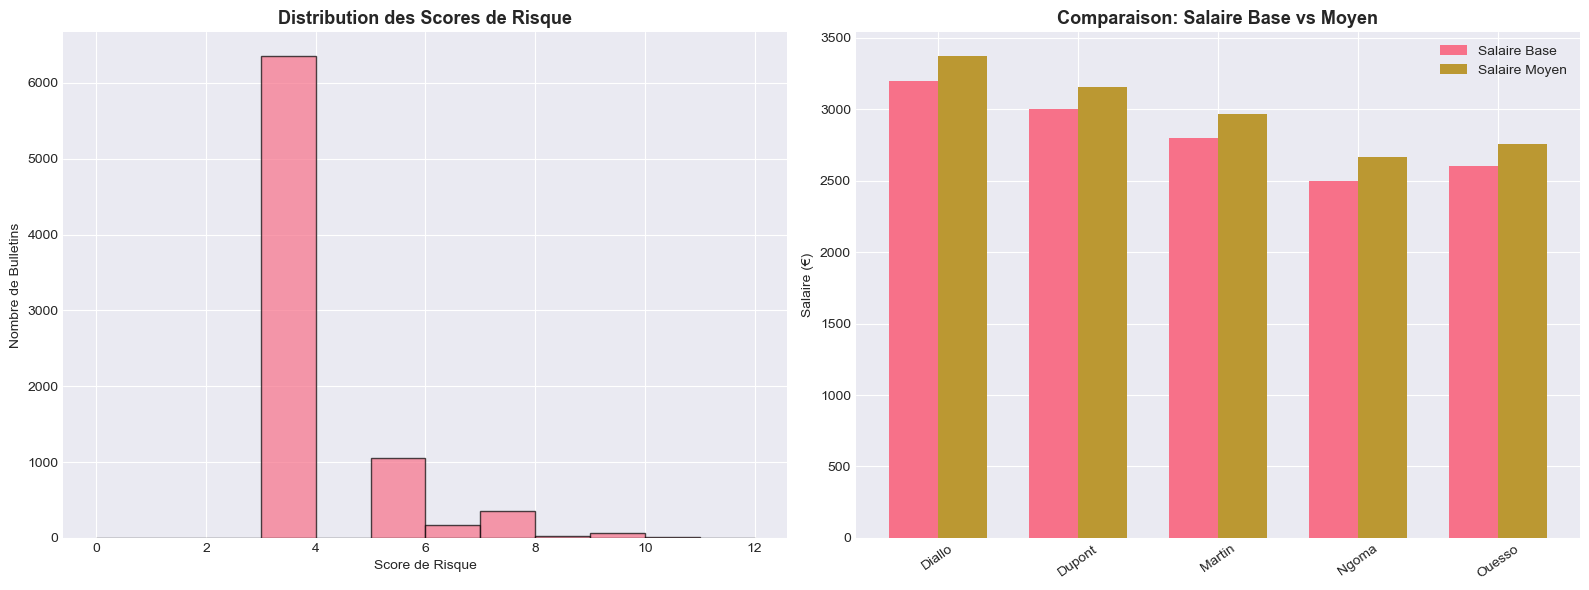

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 4. Distribution du score de risque ---
axes[0].hist(
    df_complete['score_risque'],
    bins=range(0, df_complete['score_risque'].max() + 2),
    edgecolor='black',
    alpha=0.7
)

axes[0].set_title('Distribution des Scores de Risque', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Score de Risque')
axes[0].set_ylabel('Nombre de Bulletins')


# --- 5. Comparaison salaire base vs moyen ---
comp_salaire = df_complete.groupby('nom').agg({
    'salaire_base': 'first',
    'salaire_brut': 'mean'
}).reset_index()

x = range(len(comp_salaire))
width = 0.35

axes[1].bar(
    [i - width/2 for i in x],
    comp_salaire['salaire_base'],
    width,
    label='Salaire Base'
)

axes[1].bar(
    [i + width/2 for i in x],
    comp_salaire['salaire_brut'],
    width,
    label='Salaire Moyen'
)

axes[1].set_title('Comparaison: Salaire Base vs Moyen', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Salaire (€)')
axes[1].set_xticks(list(x))
axes[1].set_xticklabels(comp_salaire['nom'], rotation=35)
axes[1].legend()


plt.tight_layout()
plt.show()

✅ Visualisations supplémentaires créées!
📁 Fichier: ./output\PaieGuard_Visualisations_Supplementaires.png

TOUS LES FICHIERS ONT ÉTÉ GÉNÉRÉS AVEC SUCCÈS!


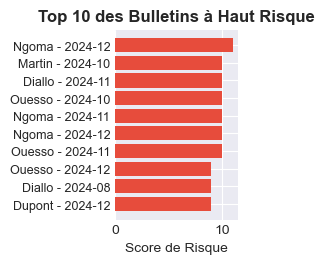

In [67]:
# 6. Top 10 des bulletins à risque
plt.subplot(2, 3, 6)
top_risques = df_complete.nlargest(10, 'score_risque')[['nom', 'mois', 'score_risque']]
y_pos = range(len(top_risques))
colors_top = ['#e74c3c' if x >= 6 else '#e67e22' if x >= 4 else '#f39c12' for x in top_risques['score_risque']]
plt.barh(y_pos, top_risques['score_risque'], color=colors_top)
# Conversion de la colonne 'mois' en datetime
top_risques['mois'] = pd.to_datetime(top_risques['mois'])

# Votre ligne de code fonctionnera alors parfaitement
labels = [f"{row['nom'][:8]} - {row['mois'].strftime('%Y-%m')}" for _, row in top_risques.iterrows()]
plt.yticks(y_pos, labels, fontsize=9)
plt.xlabel('Score de Risque')
plt.title('Top 10 des Bulletins à Haut Risque', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()

# Créer le répertoire de sortie s'il n'existe pas
import os
output_dir = './output'  # Utilisation d'un chemin relatif dans le répertoire courant
os.makedirs(output_dir, exist_ok=True)  # Crée le répertoire s'il n'existe pas

# Sauvegarder le fichier dans le nouveau répertoire
output_path = os.path.join(output_dir, 'PaieGuard_Visualisations_Supplementaires.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ Visualisations supplémentaires créées!")
print(f"📁 Fichier: {output_path}")

print("\n" + "="*80)
print("TOUS LES FICHIERS ONT ÉTÉ GÉNÉRÉS AVEC SUCCÈS!")
print("="*80)
# Conversion de la colonne 'mois' en datetime
top_risques['mois'] = pd.to_datetime(top_risques['mois'])

# Votre ligne de code fonctionnera alors parfaitement
labels = [f"{row['nom'][:8]} - {row['mois'].strftime('%Y-%m')}" for _, row in top_risques.iterrows()]

In [ ]:
#Excellent ! J'ai analysé les données et effectué des recherches approfondies sur les systèmes d'audit de paie. Voici mes conclusions :
Analyse des données :
8 020 bulletins de paie analysés sur 5 mois (août-décembre 2024)
5 employés avec différents profils et types de contrat
Masse salariale totale : 23,9M€ avec 5,5M€ de charges sociales
Anomalies détectées : 358 cas d'heures anormales, 793 primes élevées, 394 dépassements d'heures supplémentaires

In [ ]:
Insights clés :
Les écarts de salaire moyens sont de +5-7% par rapport au salaire de base
4,46% des bulletins présentent des anomalies d'heures
Les heures supplémentaires dépassent souvent les seuils légaux
Je vais maintenant créer une présentation professionnelle selon la méthodologie de votre professeur, avec une analyse approfondie et des recommandations actionnables.